In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

url = "https://raw.githubusercontent.com/DanielCohen13/Fake_News/refs/heads/main/fake_news_dataset.csv"
fake_news_df = pd.read_csv(url)

## Correlation

In [3]:
# Filtering

filtered_df = fake_news_df[['category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label']].copy()

In [4]:
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(filtered_df[["political_bias", "fact_check_rating", "label", "category"]]).toarray()
feature_labels = ohe.get_feature_names_out(["political_bias", "fact_check_rating", "label", "category"])
features = pd.DataFrame(feature_arry, columns=feature_labels)

filtered_df_numeric = filtered_df.drop(columns=["political_bias", "fact_check_rating", "label", "category"])

result_df = pd.concat([filtered_df_numeric, features], axis=1)

result_df["content"] = result_df['word_count'] + result_df['char_count'] + result_df['readability_score']
result_df["engagement"] = result_df['num_shares'] + result_df['num_comments'] + result_df['clickbait_score']
result_df["media_elements"] = result_df['has_images'] + result_df['has_videos']
result_df["credibility_metrics"] = result_df['trust_score'] + result_df['source_reputation']
result_df["fact_checking"] = result_df['fact_check_rating_FALSE'] + result_df['fact_check_rating_Mixed'] + result_df['fact_check_rating_TRUE'] + result_df['label_Fake'] + result_df['label_Real']

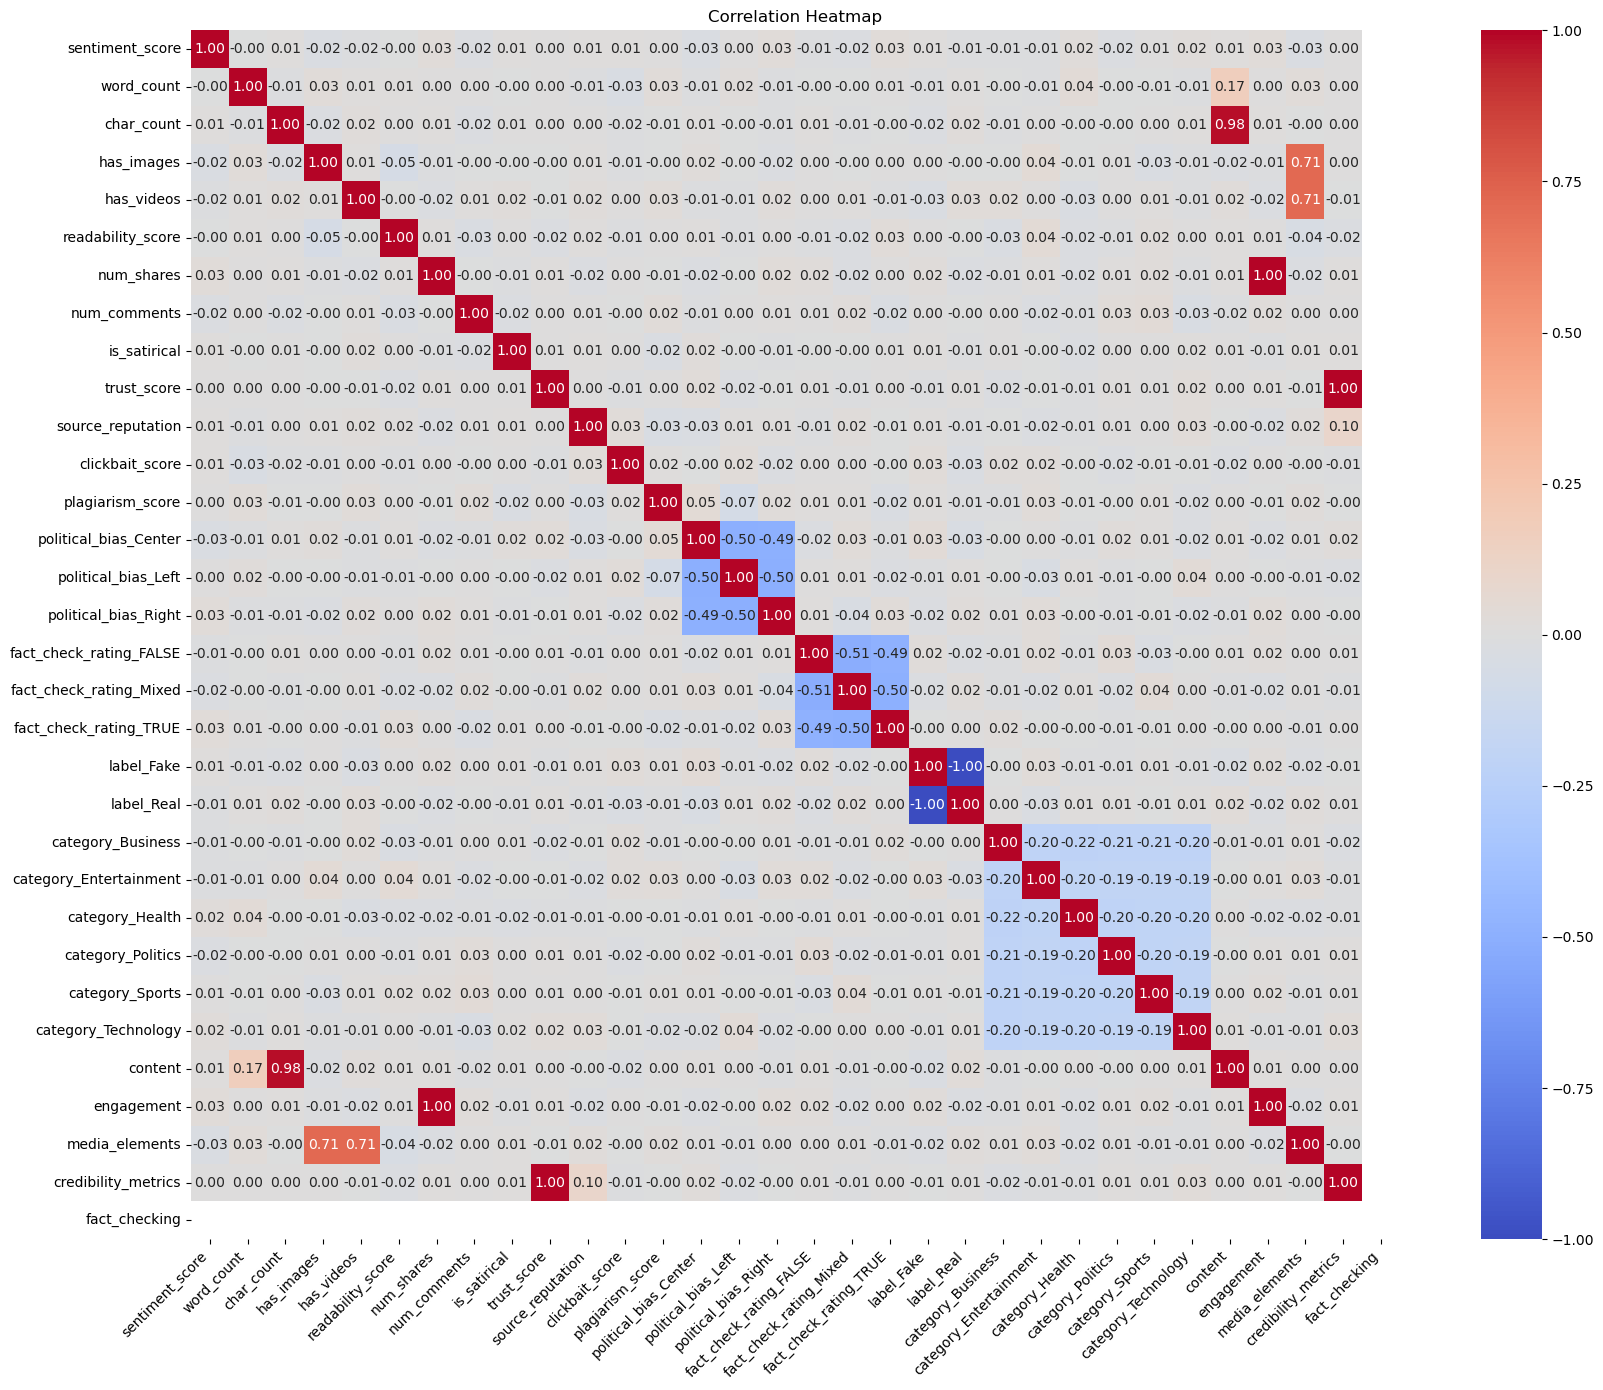

In [5]:
# Showing it with Heatmap
corr_matrix = result_df.corr()
plt.figure(figsize=(18, 14));
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

### choosing specific columns for comparision

In [7]:
target_features = [
    'political_bias_Left', 'political_bias_Right', 'political_bias_Center',
    'category_Business', 'category_Entertainment', 'category_Politics', 'category_Sports',
    'fact_check_rating_FALSE', 'fact_check_rating_Mixed', 'fact_check_rating_TRUE',
    'label_Fake', 'label_Real'
]
comparison_features = ['sentiment_score', 'content', 'engagement', 'media_elements', 'credibility_metrics', 'plagiarism_score']

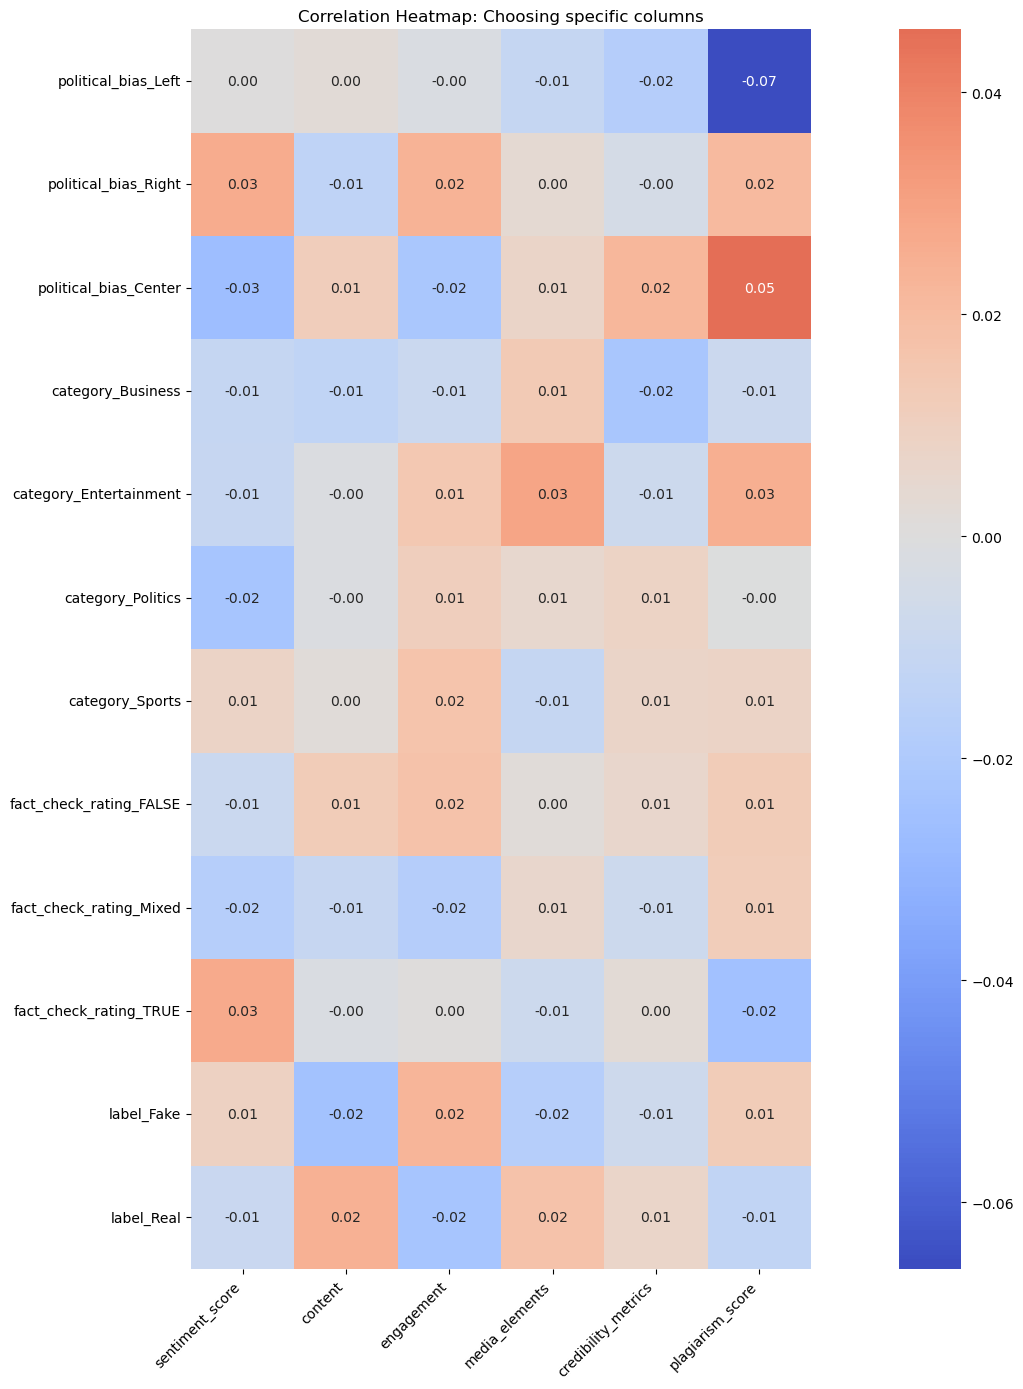

In [8]:
corr_matrix = result_df.corr()
heatmap_data = corr_matrix.loc[target_features, comparison_features]

plt.figure(figsize=(18, 14));
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: Choosing specific columns")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

## Date Time

In [10]:
# date-time

fake_news_df["date_published"] = pd.to_datetime(fake_news_df.date_published)
fake_news_df["date_published"]

C:\Users\danie\AppData\Local\Temp\ipykernel_48260\1628313496.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fake_news_df["date_published"] = pd.to_datetime(fake_news_df.date_published)


0      2021-11-30
1      2021-09-02
2      2021-04-13
3      2020-03-08
4      2022-03-23
          ...    
3995   2020-04-25
3996   2022-01-09
3997   2023-03-03
3998   2021-04-13
3999   2023-12-20
Name: date_published, Length: 4000, dtype: datetime64[ns]

## Data Understanding

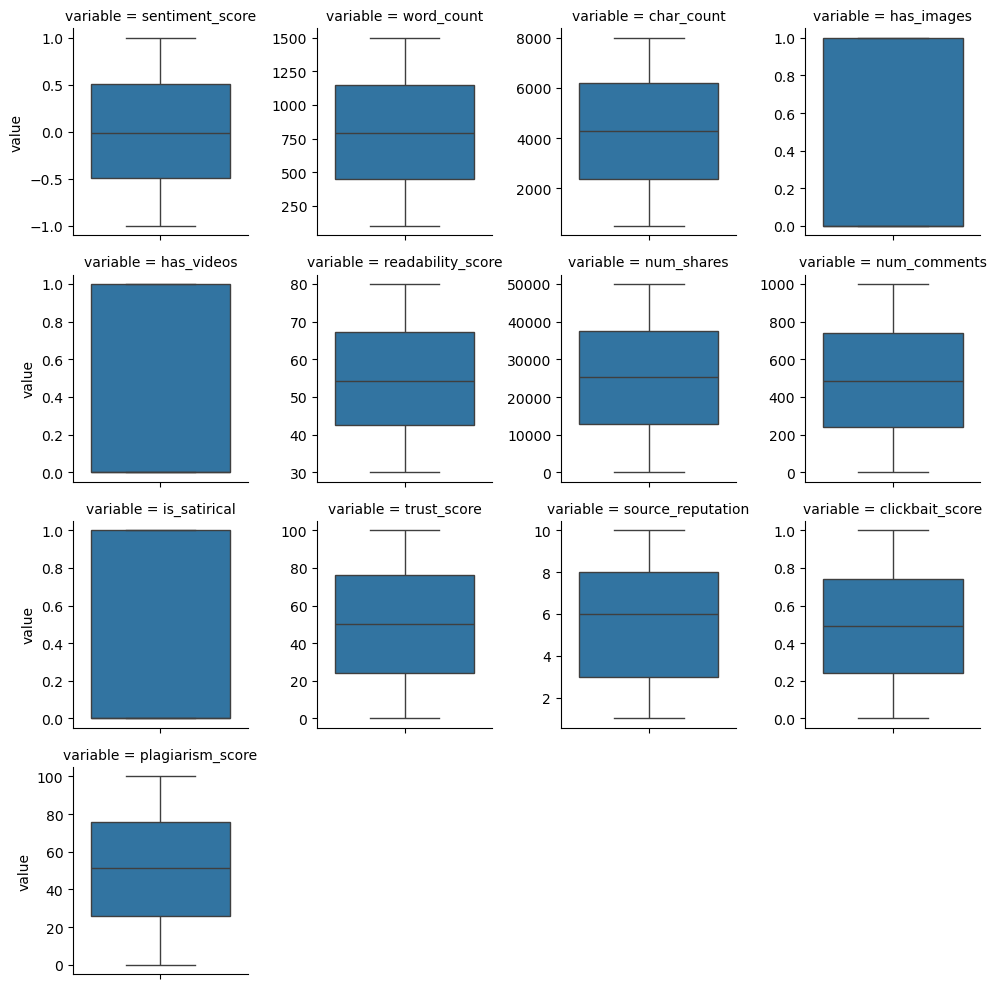

In [12]:
features = fake_news_df.select_dtypes(include='number').columns
melted_fake_news_df = pd.melt(fake_news_df, id_vars='id', value_vars=features.drop('id'))
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

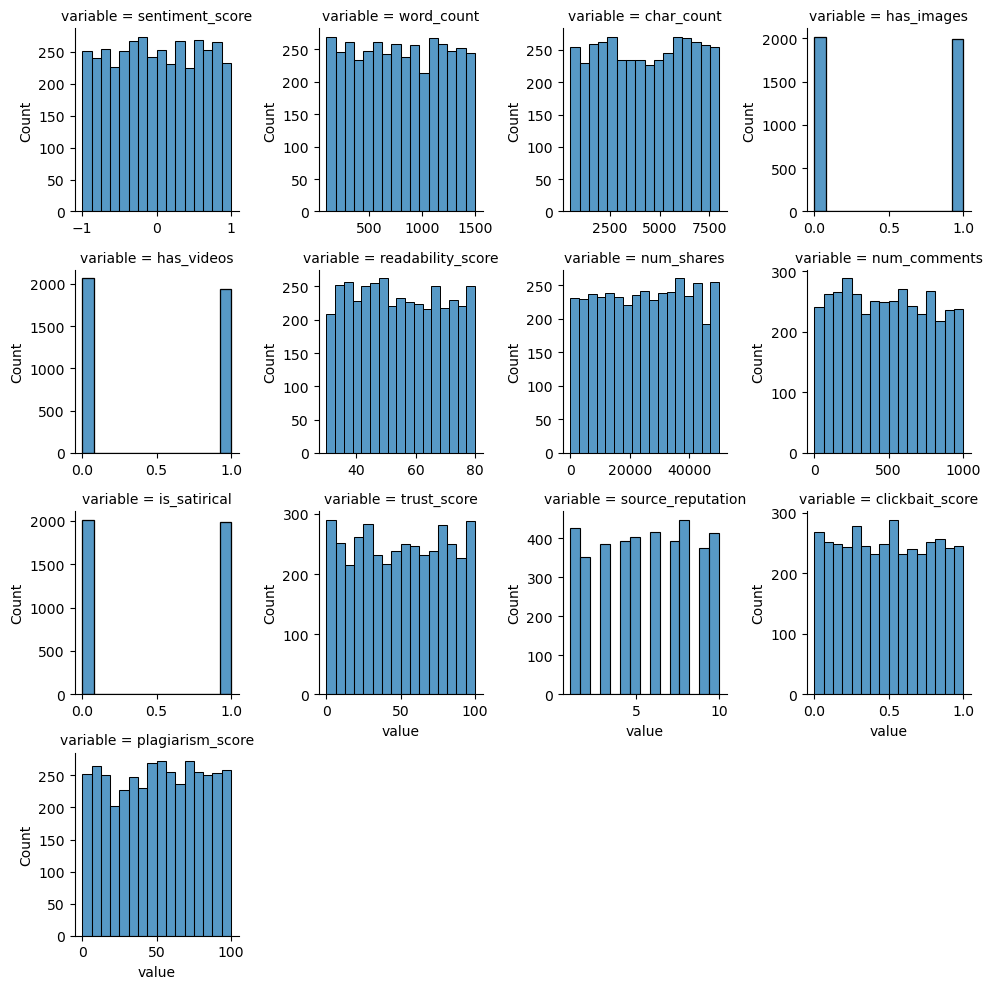

In [13]:
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False, sharex = False)
g.map_dataframe(sns.histplot, x = 'value')
plt.show()

In [14]:
# Checking which columns are categorial

non_numeric_columns = fake_news_df.select_dtypes(include='object')
non_numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              4000 non-null   object
 1   author             4000 non-null   object
 2   text               4000 non-null   object
 3   state              4000 non-null   object
 4   source             4000 non-null   object
 5   category           4000 non-null   object
 6   political_bias     4000 non-null   object
 7   fact_check_rating  4000 non-null   object
 8   label              4000 non-null   object
dtypes: object(9)
memory usage: 281.4+ KB


In [15]:
fake_news_df.label

0       Fake
1       Fake
2       Fake
3       Fake
4       Real
        ... 
3995    Fake
3996    Fake
3997    Fake
3998    Real
3999    Real
Name: label, Length: 4000, dtype: object